<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/Seaborn_Catplot%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2



# Categorical scatterplots:

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

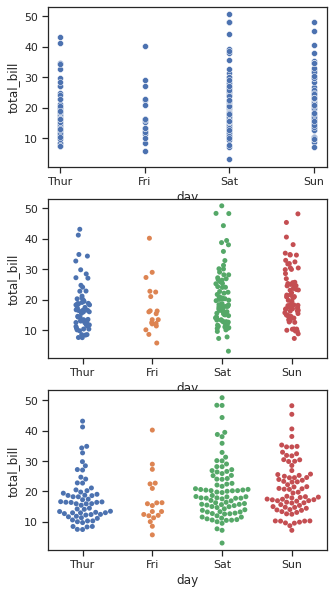

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,10))

sns.scatterplot(data=tips, x='day', y='total_bill', ax=axes[0])

sns.stripplot(data=tips, x='day', y='total_bill', ax=axes[1]) # scatterplot의 값이 한줄로 표현되어 구분하기힘든 문제 보완

sns.swarmplot(data=tips, x='day', y='total_bill', ax=axes[2])

# Categorical distribution plots:

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

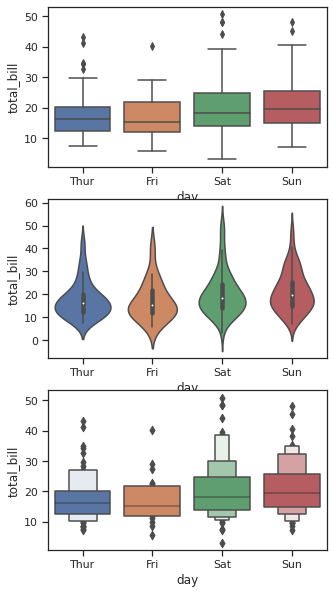

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,10))

sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[0])

sns.violinplot(data=tips, x='day', y='total_bill', ax=axes[1])

sns.boxenplot(data=tips, x='day', y='total_bill', ax=axes[2])

# Categorical estimate plots:

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

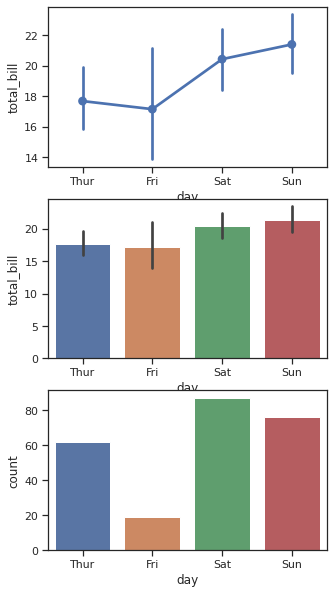

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,10))

sns.pointplot(data=tips, x='day', y='total_bill', ax=axes[0]) # 평균

sns.barplot(data=tips, x='day', y='total_bill', ax=axes[1]) # 평균

sns.countplot(data=tips, x='day', ax=axes[2]) # 빈도수

# catplot과 비교
- scatterplot과의 차이점은 단지 subplot를 사용할수있는지 여부다
- subplot을 사용할수 없다
- 함수내부에 subplot기능이 있어 'col'속성을 사용하여 유사한 기능을 만들수있다

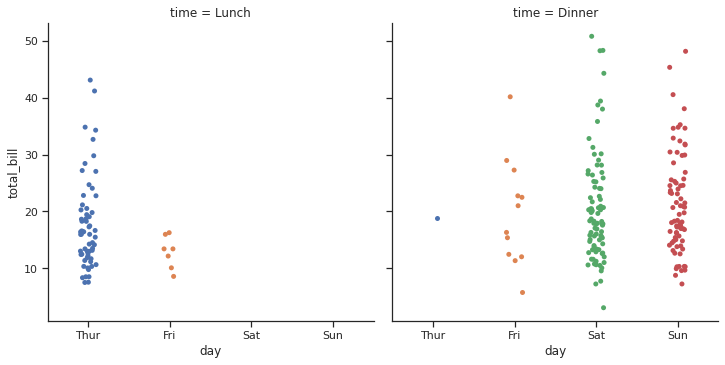

In [23]:
sns.catplot(data=tips, x='day', y='total_bill', col='time')

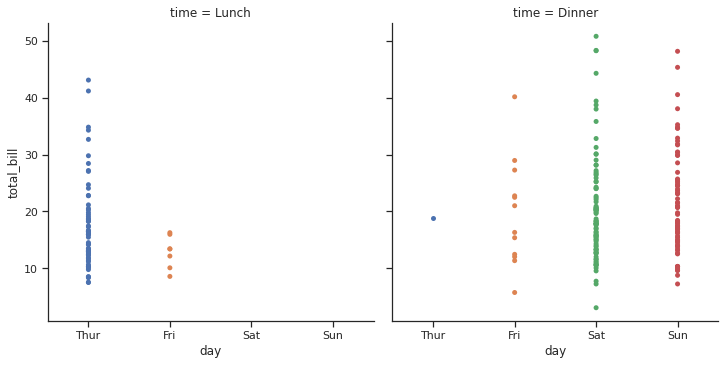

In [37]:
sns.catplot(data=tips, x='day', y='total_bill', col='time', jitter=False) #scatterplot과 유사

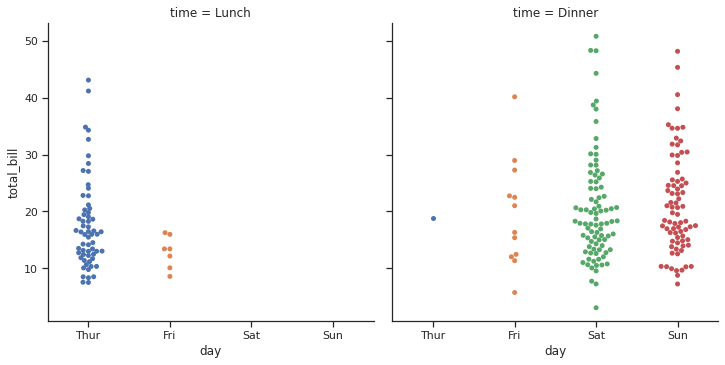

In [24]:
sns.catplot(data=tips, x='day', y='total_bill', col='time', kind = 'swarm')

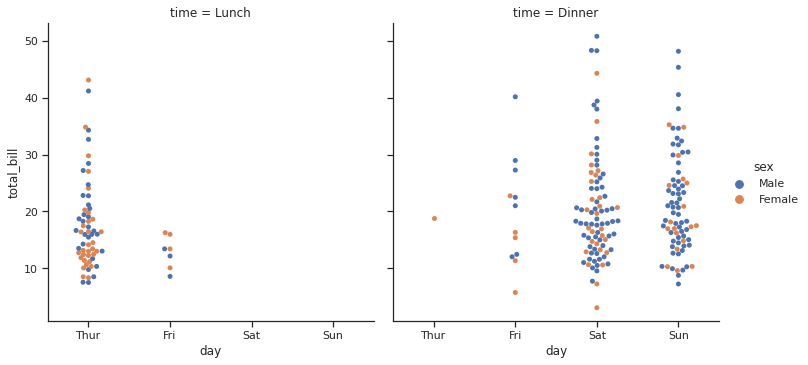

In [26]:
sns.catplot(data=tips, x='day', y='total_bill', col='time', kind = 'swarm', hue='sex')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


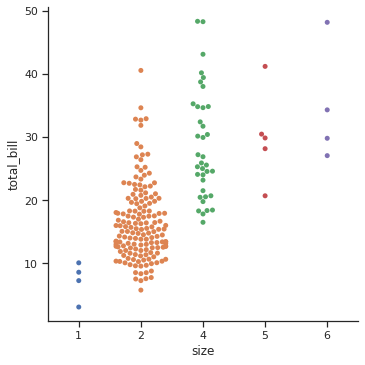

In [36]:
sns.catplot(x='size', y='total_bill', kind = 'swarm', data=tips.query('size != 3')) # X축인 size인데 size가 3인 항목 제외하고 그래프를 그린다

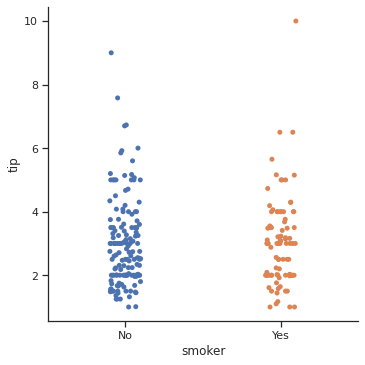

In [39]:
 sns.catplot(x='smoker', y='tip', data=tips, order=['No', 'Yes']) # order에 입력한 값의 순서에 따라 그래프 X축에 표시된다

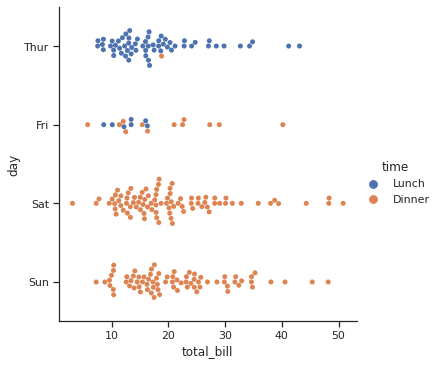

In [40]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

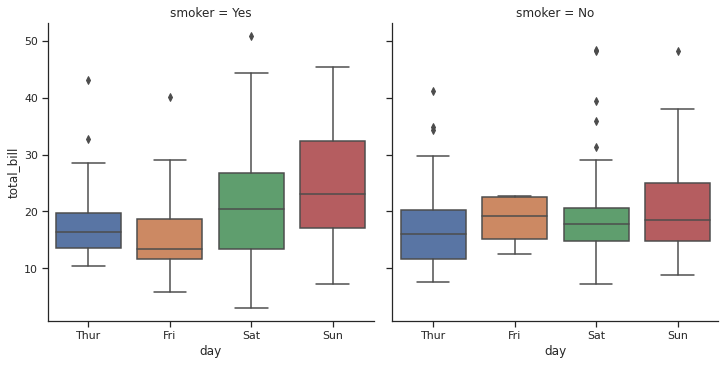

In [58]:
 sns.catplot(data=tips, x='day', y='total_bill', kind='box', col='smoker')

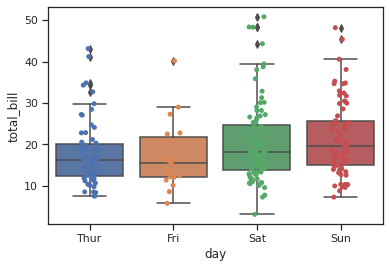

In [45]:
sns.stripplot(data=tips, x='day', y='total_bill')
sns.boxplot(data=tips, x='day', y='total_bill')

In [49]:
group = tips.groupby(['day'])['total_bill'].describe() # 통계값
group 

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


In [51]:
Thur = group.loc['Thur']
Thur

count    62.000000
mean     17.682742
std       7.886170
min       7.510000
25%      12.442500
50%      16.200000
75%      20.155000
max      43.110000
Name: Thur, dtype: float64

In [56]:
IQR = Thur['75%'] - Thur['25%']
Thur_min = Thur['25%'] - (1.5 * IQR)
Thur_max = Thur['75%'] + (1.5 * IQR)
IQR, Thur_min, Thur_max # box 그래프에 나타나는 최대, 최소값이다

(7.712500000000002, 0.8737499999999958, 31.723750000000003)

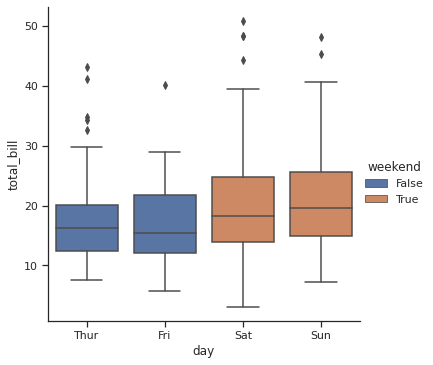

In [61]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend", # weekend만 다른색으로 표현
            kind="box", dodge=False, data=tips)

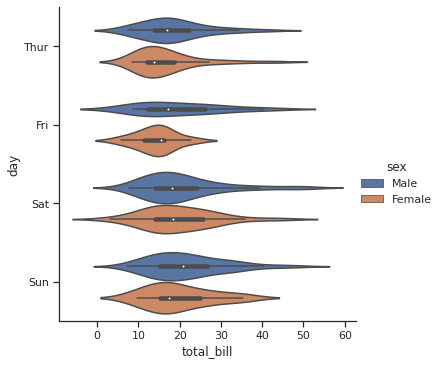

In [62]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips)

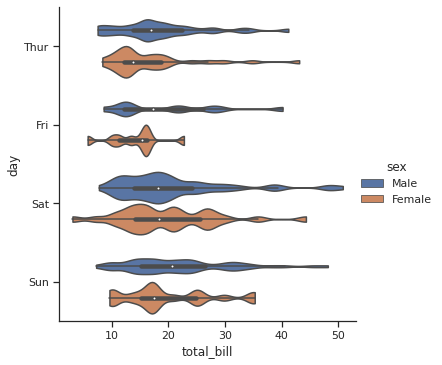

In [63]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips)

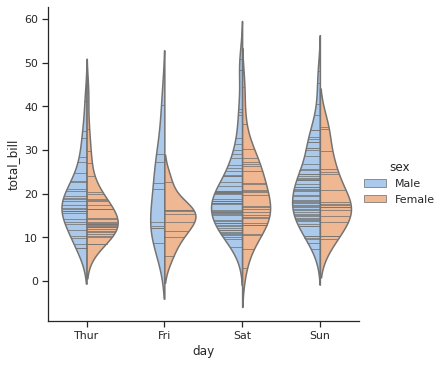

In [67]:
sns.catplot(x="day", y="total_bill", hue="sex", # 성별에 따라 반씩 그림
            kind="violin", split=True, data=tips,
            inner='stick', #빈도수를 표시
            palette='pastel')

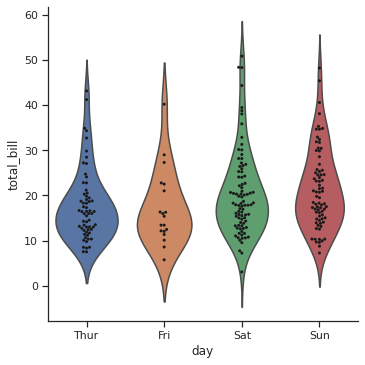

In [68]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)